In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Experimental

In [3]:
df1 = pd.read_csv("../data/Datos_Dist.csv", usecols=[0,2,4,6])
df2 = pd.read_csv("../data/Dato exportado_090833.csv", sep=";", usecols=[2, 11, 20, 29],
                  skiprows=2, names=["SET5", "SET6", "SET8", "SET7"], decimal=",")
data = df1.join(df2)

data = data[["SET1","SET2","SET3","SET4","SET5", "SET6", "SET7", "SET8"]]

data_prom = round(data.mean(), 4)
data_std = round(data.std(), 4)

res_t = 0.0001

In [4]:
x={'SET1':[0.6], 'SET2':[0.4], 'SET3':[0.2], 'SET4':[0.0763], 'SET5':[0.0862], 'SET6':[0.061], 'SET7':[0.0194], 'SET8':[0.0114]} 
delta_x=pd.DataFrame(data=x)
delta_x_err=[0.001, 0.001, 0.001, 0.00005, 0.00005, 0.00005, 0.00005, 0.00005]

In [73]:
vel = round(delta_x/data_prom, 4)
vel

,SET1,SET2,SET3,SET4,SET5,SET6,SET7,SET8
0,0.5314,0.5384,0.5432,0.5336,0.6053,0.5561,0.533,0.4935


In [74]:
err = round(((1/data_prom)*data_std)+(delta_x/data_prom**2)*delta_x_err,4)
err

,SET1,SET2,SET3,SET4,SET5,SET6,SET7,SET8
0,0.0011,0.0015,0.0023,0.0009,0.0009,0.0012,0.0007,0.0011


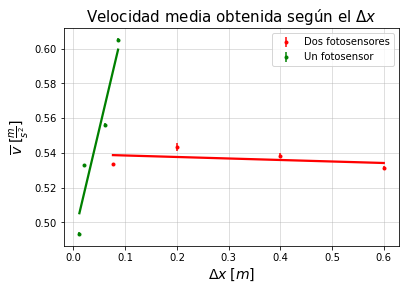

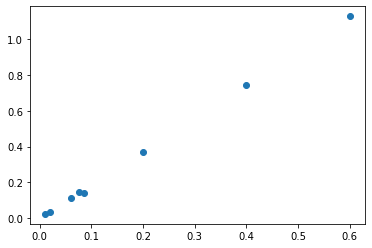

In [72]:
plt.errorbar(delta_x.iloc[0][0:4], vel.iloc[0][0:4], yerr=err.iloc[0][0:4], fmt=".r", label="Dos fotosensores")
sns.regplot(x=delta_x.iloc[0][0:4], y=vel.iloc[0][0:4], ci=None, scatter=False, color="r")
plt.errorbar(delta_x.iloc[0][4:10], vel.iloc[0][4:10], yerr=err.iloc[0][4:10], fmt=".g", label="Un fotosensor")
sns.regplot(x=delta_x.iloc[0][4:10], y=vel.iloc[0][4:10], ci=None, scatter=False, color="g")
plt.legend()
plt.grid(alpha=0.5)
plt.title(r"Velocidad media obtenida según el $\Delta x$", size=15)
plt.ylabel(r"$\overline{v}\;[\frac{m}{s^2}]$", size=14)
plt.xlabel(r"$\Delta x\;[m]$", size=14)
plt.figure()
plt.scatter(delta_x.iloc[0], data_prom) 
# sns.regplot(delta_x, vel)

In [24]:
tabla_final = pd.DataFrame(columns=delta_x.iloc[0])
for i in range(0,8):
    tabla_final[tabla_final.columns[i]] = data["SET"+str(i+1)]
tabla_final.T

,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0.6000,1.1286,1.1287,1.1300,1.1292,1.1295,1.1292,1.1298,1.1276,1.1289,1.1281
0.4000,0.7429,0.7423,0.7442,0.7434,0.7433,0.7426,0.7424,0.7427,0.7424,0.7427
0.2000,0.3686,0.3684,0.3682,0.3676,0.3685,0.3684,0.3680,0.3682,0.3678,0.3679
0.0763,0.1430,0.1431,0.1431,0.1430,0.1431,0.1430,0.1430,0.1429,0.1431,0.1431
0.0862,0.1425,0.1427,0.1424,0.1425,0.1424,0.1423,0.1423,0.1424,0.1422,0.1423
0.0610,0.1096,0.1098,0.1096,0.1098,0.1095,0.1098,0.1097,0.1099,0.1096,0.1097
0.0194,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0363,0.0364,0.0364
0.0114,0.0231,0.0231,0.0231,0.0231,0.0231,0.0231,0.0231,0.0231,0.0231,0.0231


# Teórico

In [11]:
x_tabla = 0.0268
alfa = np.arcsin(x_tabla)
v_f = np.sqrt(2*9.7803*x_tabla*0.6)
vel/v_f

,SET1,SET2,SET3,SET4,SET5,SET6,SET7,SET8
0,0.947518,0.959999,0.968558,0.951441,1.079286,0.99156,0.950371,0.87994
